#Линейные модели

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings( "ignore")

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

## **Линейная регрессия**

Зависимость предсказываемой переменной от признаков будет линейной, если имеет следующий вид:
 
$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i}.$$
 
где веса $w_{i}$ и  $w_{0}$ - _свободным коэффициентом_ или _сдвигом_. 

Оптимизация модели в таком случае заключается в подборе оптимальных значений весов. 

Линейную модель можно описать как скалярное произведение вектора признаков $x=(x^{1},...,x^{d})$ на вектор весов $w=(w_{1},...,w_{d})$:
 
$$a(x) = w_{0}+\left \langle w,x \right \rangle.$$
 
или добавить еще один признак (константный), на каждом объекте равный единице, тогда получим
 
$$a(x) = \sum^{d+1}_{i=1}w_{i}x^{i}=\left \langle w,x \right \rangle.$$
 
За счет простой формы линейные модели достаточно легко обучются и позволяют работать с зашумленными данными, небольшими выборками, контролирауя при этом риск переобучения.

Для обучения модели можно взять в качестве функционала ошибки модуль отклонения $Q(a,y)=|a(x)-y|$. Соответствующий функционал ошибки называется средним абсолютным отклонением (mean absolute error, MAE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}|a(x_{i})-y_{i}|.$$

Однако, методы оптимизации включают в себя дифференцирование, а функция модуля не является гладкой - она не имеет производной в нуле.

Распространенный метод оценки потерь - квадрат разности $Q(a,y)=(a(x)-y)^{2}$. Такая функция является гладкой и имеет производную в каждой точке, а ее минимум достигается при равенстве истинного ответа $y$ и прогноза $a(x)$.

Основанный на этой функции функционал ошибки называется _среднеквадратичным отклонением_ (mean squared error, MSE):

$$Q(a,x) = \frac{1}{l}\sum^{l}_{i=1}(a(x_{i})-y_{i})^{2}.$$

### **МНК**
Продифференцировав данную функцию по вектору $w$ и приравняв к нулю, можно получить явную анатилическую формулу для решения задачи минимизации (можно смотреть тут https://ml-handbook.ru/chapters/linear_models/intro или тут https://habr.com/ru/company/ods/blog/323890/):

$$w = (X^{T}X)^{-1}X^{T}y.$$

Это решение называется _нормальным уравнением_ линейной регрессии.

Проблемы:
  - вычислительная сложность операции (обращение матрицы $X^{T}X$ будет иметь кубическую сложность от количества признаков $d^{3}$), 
  - матрица $X^{T}X$ может быть вырожденной и поэтому необратимой

### **Градиентный спуск**

- От стартовой точки будем итерационно сдвигаться в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. 
- $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

- для квадратичных потерь градиент принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

- функция из sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score):
    - fit_intercept , по умолчанию = True (делать ли центрирование).
    - объект имеет атрибуты coef_ и intercept_ , которые соответствуют весам $w_{i}$ и  $w_{0}$
    - объект регрессия нужно создать : LinearRegression()
    - провести обучение : .fit(X,y)
    - использовать для предсказания : .predict(X)

.




### **Задание 1**

генерация решения для модели в форме линейной регрессии


In [8]:
#from sklearn.datasets import load_boston

# любой набор данных для непрервных целей

import sklearn.datasets as datasets 
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score # коэффициент детерминации 


import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

V = [data,target]
#V = load_boston(return_X_y=True)

In [9]:
x = V[0]
y = V[1]
x.shape, y.shape  # x - описание объектов, у - стоимость объектов



((506, 13), (506,))

Разделяем данные:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(x, y, test_size=0.2, random_state=1)

Обучаем модель:

In [12]:
reg = LinearRegression() # Создали объект линейная регрессия
reg.fit(X_train_tr, y_train_tr) # обучили
reg.score(X_test_tr, y_test_tr) # Возвращает коэффициент детерминации прогноза


0.7634174432138481

In [13]:
y_pred = reg.predict(X_test_tr) # сделали предсказание

Визуализируем результаты:

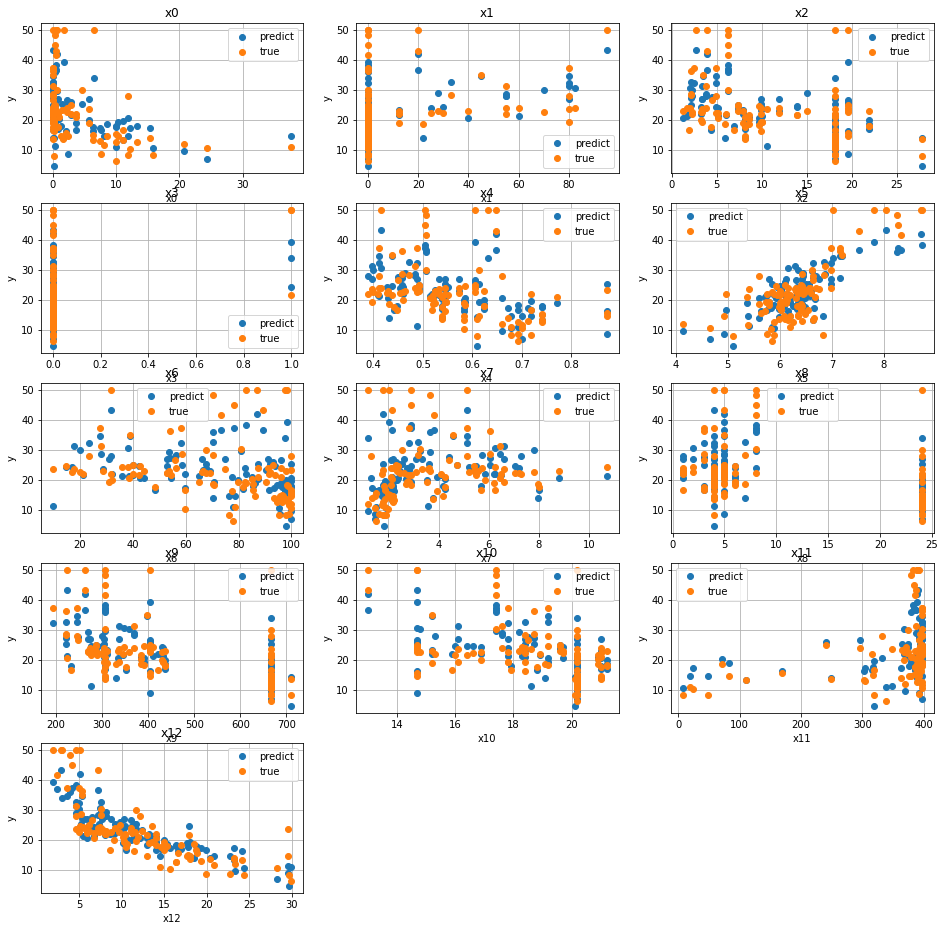

In [14]:
plt.figure(figsize = (16,16))
for i in range(X_test_tr.shape[1]):
  plt.subplot(5,3,i+1)
  plt.plot(X_test_tr[:, i],y_pred,'o', label = 'predict')
  plt.plot(X_test_tr[:, i],y_test_tr,'o', label = 'true')
  plt.title('x'+str(i))
  plt.xlabel('x'+str(i))
  plt.ylabel('y')
  plt.grid()
  plt.legend()
plt.show()  

Связь предсказания и истиных значений (тут сильная связь == хорошее предсказание)

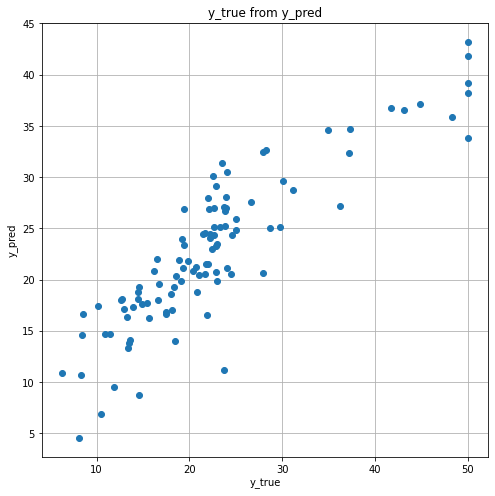

In [15]:
plt.figure(figsize = (8,8))
plt.plot(y_test_tr,y_pred,'o', label = 'predict')
plt.title('y_true from y_pred')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.grid()
plt.show()  

In [16]:
from sklearn.datasets import  make_regression

X, y = make_regression(n_samples=500, n_features=2, noise=1, random_state=42)

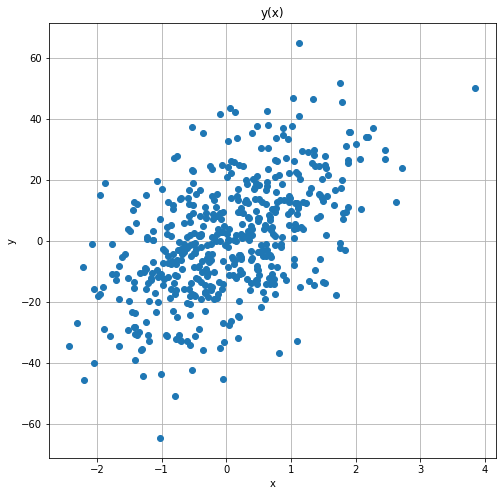

In [17]:
plt.figure(figsize = (8,8))
plt.plot(X[:,0],y,'o', label = 'y(x)')
plt.title('y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()  

1.1. Построить регрессию на всех признаках сразу (см. пример выше). Использовать make_regression с вариантными параметрами: 
  - n_samples=500 (проверить результаты для вариантов : 100, 10, 5000), 
  - n_features=2 + (номер по журналу % 5), noise=0ю5 + 0.1 * (номер по журналу % 3)

1.2. Построить регрессию от каждого признака отдельно

1.3. Сравнить коэффициент детерминации для регрессии по каждому признаку отдельно с коэффициентом детерминации модели на всех признаках 

1.4. Выбрать опираясь на результаты генерации моделей по одному признаку 5 признаков, которые использовать для построения регрессии на этих признаках

1.5. Сделать визуальную оценку результатов обучения моделей и определить лучшую по коэффициенту детерминации модель

1.6. Сделать выводы


In [39]:
params = {
  'n_samples': [10, 100, 5000]
}

r2_scores = []
for i in range(len(params['n_samples'])):
  # Генерация данных
  X, y = make_regression(n_samples=params['n_samples'][i], n_features=(2 + (14 % 5)), noise= (0.5 + 0.1 * (14 % 3)), random_state=42)

  # Разделение данных на обучающую и тестовую выборки
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Создание и обучение модели линейной регрессии
  reg_all = LinearRegression().fit(X_train, y_train)

  reg_all_pred = reg_all.predict(X_test)


  # Вычисление коэффициента детерминации на тестовой выборке
  r2_score_all = r2_score(y_test, reg_all_pred)

  r2_scores.append({'n_samples':params['n_samples'][i],
                    'r2_score': r2_score_all})

# Вывод результата
r2_scores_df = pd.DataFrame(r2_scores)
print(r2_scores_df)
# print('Коэффициент детерминации на всех признаках:', r2_score_all)


   n_samples  r2_score
0         10  0.989297
1        100  0.999979
2       5000  0.999978


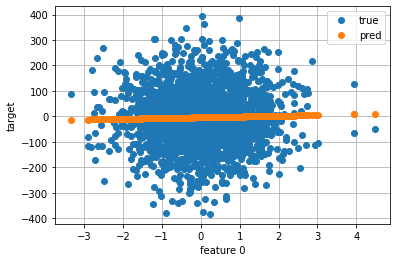

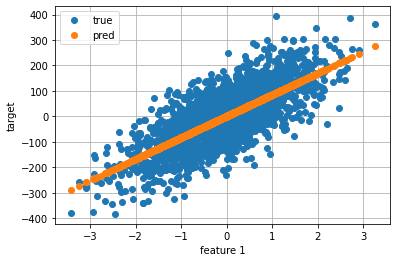

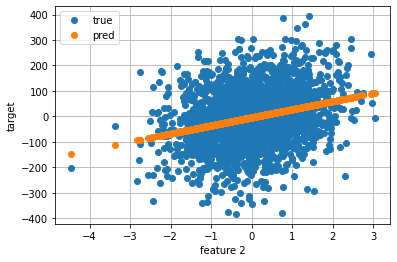

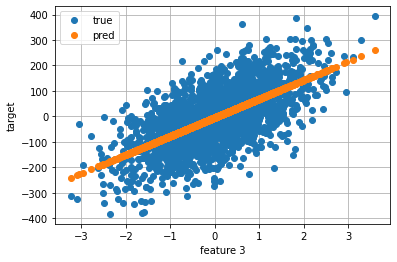

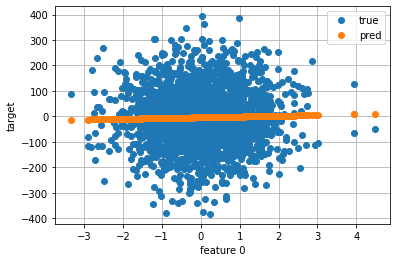

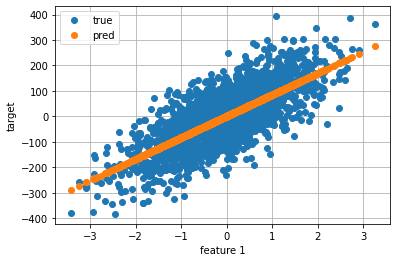

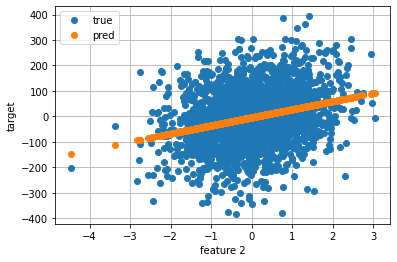

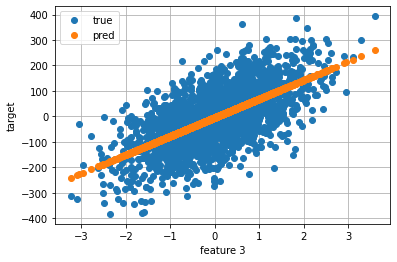

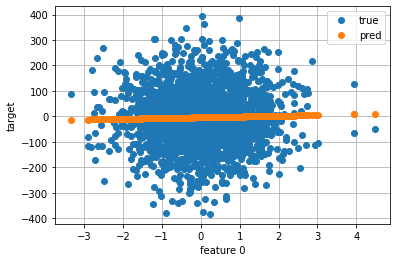

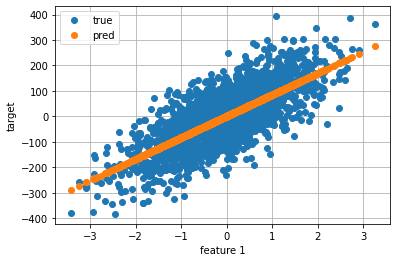

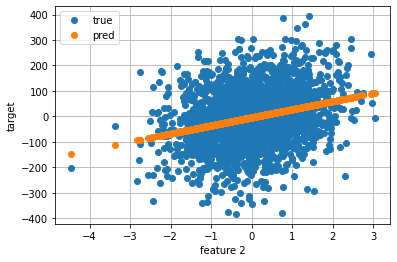

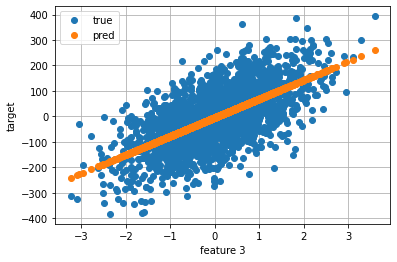

    n_samples  feature  r2_scores
0          10        0   0.000660
1          10        1   0.540888
2          10        2   0.072913
3          10        3   0.400905
4         100        0   0.000660
5         100        1   0.540888
6         100        2   0.072913
7         100        3   0.400905
8        5000        0   0.000660
9        5000        1   0.540888
10       5000        2   0.072913
11       5000        3   0.400905


In [50]:
params = {
  'n_samples': [10, 100, 5000]
}

res = []
for i in range(len(params['n_samples'])):
  # Генерация данных
    X, y = make_regression(n_samples=10000, n_features = (2 + (7 % 5)), noise = (0.5 + 0.1 * (7 % 3)), random_state=42)

  # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,train_size=params['n_samples'][i], random_state=42)

  # Создание и обучение модели линейной регрессии
    reg = LinearRegression().fit(X_train, y_train)
  # Перебираем все признаки по очереди
    for j in range(X_test.shape[1]):
        # Обучаем модель на текущем признаке
        reg.fit(X_test[:, j].reshape(-1, 1), y_test)
        reg_pred_ = reg.predict(X_test[:, j].reshape(-1, 1))

        # Сохраняем коэффициент детерминации
        r2_score_lst = r2_score(y_test, reg_pred_)

        res.append({'n_samples': params['n_samples'][i],
                    'feature': j,
                    'r2_scores': r2_score_lst})

          # Строим график
        plt.plot(X_test[:, j], y_test, 'o', label='true')
        plt.plot(X_test[:, j], reg.predict(X_test[:, j].reshape(-1, 1)), 'o', label='pred')
        plt.xlabel('feature {}'.format(j))
        plt.ylabel('target')
        plt.grid()
        plt.legend()
        plt.show()

# res = np.array(res)  
res_df = pd.DataFrame(res)
print(res_df)

In [41]:
res_df.sort_values('r2_scores')
# print(res_df)
lst2 = []
for i in range(5):
  lst2.append((i, res_df.iloc[i].tolist()[-1]))
# dass = [res_df.iloc[i].tolist()[-1] for i in range(5)]
print(lst2)

[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 0.7629896990172205)]


In [42]:
data = [i['r2_scores'] for i in res]
data = data[:5]
print(data)

[1.0, 1.0, 1.0, 1.0, 0.7629896990172205]


In [43]:
from sklearn.linear_model import LinearRegression

# Создание массива коэффициентов детерминации для каждого признака
r2_scores = []

for i in range(X_test.shape[1]):
  X_i = X_test[:, i].reshape(-1, 1)
  reg_i = LinearRegression().fit(X_i, y_test)
  reg_i_pred_ = reg_i.predict(X_i)
  r2_scores.append(r2_score(y_test, reg_i_pred_))

# Индексы 5 признаков с наибольшим коэффициентом детерминации
fav5_ind = sorted(range(len(r2_scores)), key=lambda i: r2_scores[i], reverse=True)[:5]
print(fav5_ind)
# Создание массива с выбранными признаками
X_fav_5 = X_test[:, fav5_ind]

# Построение регрессии на выбранных признаках

[1, 2, 0, 3]


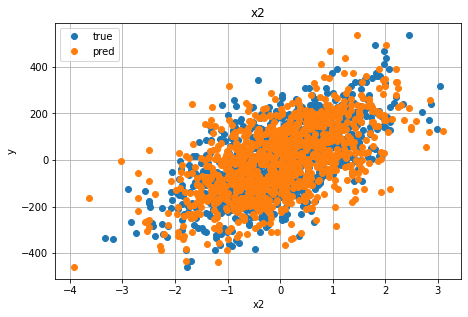

0.9999840735602257


In [44]:
selected_features=fav5_ind
X_selected_tr = X_train[:, selected_features]

X_selected = X_test[:, selected_features]

for i in [1]:
  plt.figure(figsize=(16, 16))
  plt.subplot(3, 2, i+1)
  reg = LinearRegression()
  
  reg.fit(X_selected_tr[:, :].reshape(-1, 4), y_train)
  y_pred = reg.predict(X_selected[:, :].reshape(-1, 4))
  plt.plot(X_selected[:, 0], y_test, 'o', label='true')
  plt.plot(X_selected[:, 1], y_pred, 'o', label='pred')
  plt.title(f'x{selected_features[i]}')
  plt.xlabel(f'x{selected_features[i]}')
  plt.ylabel('y')
  plt.grid()
  plt.legend()
  plt.show()
    
print(r2_score(y_test, y_pred))

In [33]:
print( selected_features )

[1.0, 1.0, 1.0, 1.0, 0.7629896990172205]
